In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
import re
import torch
import seaborn as sns

In [166]:
gita_path = "D:/ISHAN/NITK STUFF/SEM 7/PR/PROJECT/final_datasets/final_datasets/Gita.csv"
bible_path = "D:/ISHAN/NITK STUFF/SEM 7/PR/PROJECT/final_datasets/final_datasets/Bible.csv"
quran_path = "D:/ISHAN/NITK STUFF/SEM 7/PR/PROJECT/final_datasets/final_datasets/Quran.csv"

# GITA

In [142]:
df = pd.read_csv(gita_path)

In [143]:
analyzer = SentimentIntensityAnalyzer()

In [144]:
df['Sentiment'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x))
df['Positive'] = df['Sentiment'].apply(lambda x: x['pos'])
df['Neutral'] = df['Sentiment'].apply(lambda x: x['neu'])
df['Negative'] = df['Sentiment'].apply(lambda x: x['neg'])
df['Compound'] = df['Sentiment'].apply(lambda x: x['compound'])

In [145]:
df = df.sort_values(by = ['Chapter', "Verse"])
df

,Chapter,Verse,Text,Sentiment,Positive,Neutral,Negative,Compound
0,1,1,"DHRITARASHTRA: O Sanjaya, tell me what happen...","{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...",0.000,0.885,0.115,-0.3818
1,1,2,SANJAYA: Having surveyed the forces of the Pa...,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.3818
2,1,3,"O my teacher, look at this mighty army of the ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,1,4,There are heroic warriors and great archers wh...,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.300,0.700,0.000,0.8271
4,1,5,"Dhrishtaketu, Chekitana, the valiant king of K...","{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.272,0.728,0.000,0.6249
...,...,...,...,...,...,...,...,...
694,18,74,SANJAYA: This is the dialogue I heard between...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
695,18,75,"Through Vyasas grace, I have heard the supreme...","{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.274,0.726,0.000,0.7506
696,18,76,"Whenever I remember these wonderful, holy word...","{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.385,0.615,0.000,0.8176
697,18,77,And when I remember the breathtaking form of K...,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.327,0.673,0.000,0.7783


In [146]:
df.to_csv("Gita_vader.csv", index=False)

# BIBLE

In [147]:
df = pd.read_csv(bible_path)

In [148]:
analyzer = SentimentIntensityAnalyzer()

In [149]:
df['Sentiment'] = df['t'].apply(lambda x: analyzer.polarity_scores(x))
df['Positive'] = df['Sentiment'].apply(lambda x: x['pos'])
df['Neutral'] = df['Sentiment'].apply(lambda x: x['neu'])
df['Negative'] = df['Sentiment'].apply(lambda x: x['neg'])
df['Compound'] = df['Sentiment'].apply(lambda x: x['compound'])

In [150]:
df = df.sort_values(by = ['b', 'c', 'v'])
df

,b,c,v,t,Sentiment,Positive,Neutral,Negative,Compound
0,1,1,1,At the first God made the heaven and the earth.,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.403,0.597,0.000,0.6597
1,1,1,2,And the earth was waste and without form; and ...,"{'neg': 0.081, 'neu': 0.809, 'pos': 0.11, 'com...",0.110,0.809,0.081,0.0000
2,1,1,3,"And God said, Let there be light: and there wa...","{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.174,0.826,0.000,0.2732
3,1,1,4,"And God, looking on the light, saw that it was...","{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'comp...",0.283,0.717,0.000,0.7269
4,1,1,5,"Naming the light, Day, and the dark, Night. An...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
31098,66,22,17,"And the Spirit and the bride say, Come. And le...","{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",0.119,0.881,0.000,0.5574
31099,66,22,18,For I say to every man to whose ears have come...,"{'neg': 0.072, 'neu': 0.874, 'pos': 0.054, 'co...",0.054,0.874,0.072,-0.1779
31100,66,22,19,And if any man takes away from the words of th...,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.055,0.945,0.000,0.2732
31101,66,22,20,"He who gives witness to these things says, Tru...","{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.162,0.838,0.000,0.4404


In [151]:
df.to_csv("Bible_vader.csv", index=False)

# QURAN

In [152]:
df = pd.read_csv(quran_path)

In [153]:
analyzer = SentimentIntensityAnalyzer()

In [154]:
sentiment_analyzer = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

In [155]:
df['Sentiment'] = df['Verse'].apply(lambda x: analyzer.polarity_scores(x))
df['Positive'] = df['Sentiment'].apply(lambda x: x['pos'])
df['Neutral'] = df['Sentiment'].apply(lambda x: x['neu'])
df['Negative'] = df['Sentiment'].apply(lambda x: x['neg'])
df['Compound'] = df['Sentiment'].apply(lambda x: x['compound'])

# df['Sentiment'] = df['Verse'].apply(lambda x: sentiment_analyzer(x)[0])

In [156]:
df = df.sort_values(by = ['Surah', 'Ayat'])
df

,Name,Surah,Ayat,Verse,Sentiment,Positive,Neutral,Negative,Compound
0,The Opening,1,1,"In the name of Allah, the Beneficent, the Merc...","{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.292,0.708,0.000,0.5106
1,The Opening,1,2,"Praise be to Allah, Lord of the Worlds,","{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...",0.340,0.660,0.000,0.5574
2,The Opening,1,3,"The Beneficent, the Merciful.","{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.524,0.476,0.000,0.5106
3,The Opening,1,4,"Owner of the Day of Judgment,","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,The Opening,1,5,Thee (alone) we worship; Thee (alone) we ask f...,"{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou...",0.380,0.620,0.000,0.5994
...,...,...,...,...,...,...,...,...,...
6231,Mankind,114,2,"The King of mankind,","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
6232,Mankind,114,3,"The God of mankind,","{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.412,0.588,0.000,0.2732
6233,Mankind,114,4,"From the evil of the sneaking whisperer,","{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp...",0.000,0.577,0.423,-0.6597
6234,Mankind,114,5,"Who whispereth in the hearts of mankind,","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [157]:
df.to_csv("Quran_vader.csv", index=False)

In [164]:
maicow = "Men are in charge of women, because Allah hath made the one of them to excel the other, and because they spend of their property (for the support of women). So good women are the obedient, guarding in secret that which Allah hath guarded. As for those from whom ye fear rebellion, admonish them and banish them to beds apart, and scourge them. Then if they obey you, seek not a way against them."
maicow2 = "Men are in charge of women, because Allah hath made the one of them to excel the other, and because they spend of their property (for the support of women)."
maicow3 = "As for those from whom ye fear rebellion, admonish them and banish them to beds apart, and scourge them. Then if they obey you, seek not a way against them."
analyzer.polarity_scores(maicow3)

{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.765}

# ANALYSIS OF SENTIMENT

In [2]:
gita = pd.read_csv('Gita_vader.csv')
bible = pd.read_csv('Bible_vader.csv')
quran = pd.read_csv('Quran_vader.csv')

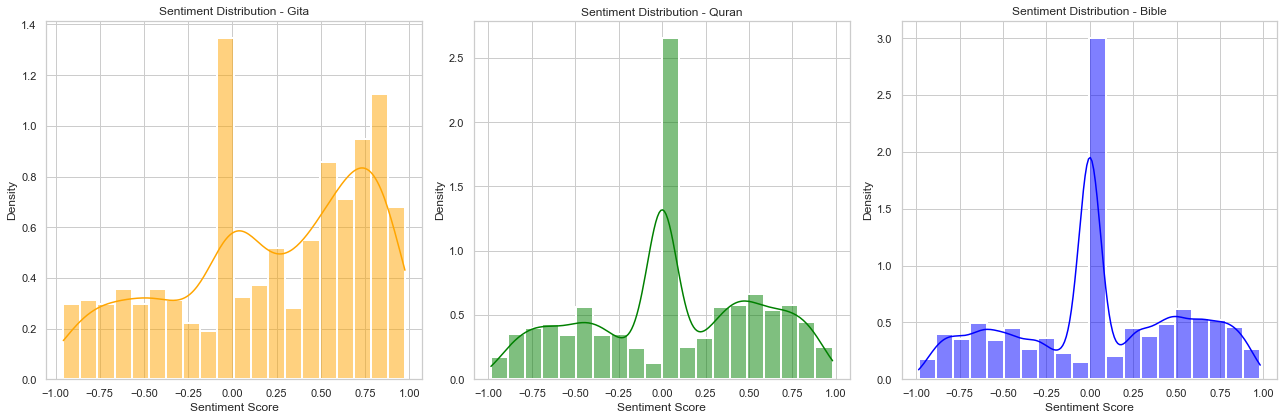

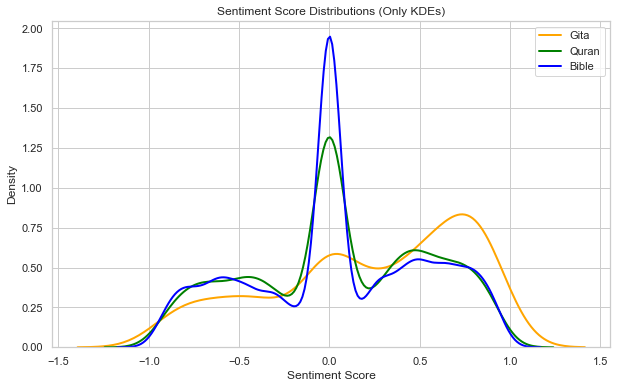

In [8]:
sns.set(style="whitegrid")

# Create 3 separate histograms with KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Gita
sns.histplot(gita['Compound'], kde=True, color='orange', ax=axes[0], bins=20, stat='density', linewidth=2)
axes[0].set_title("Sentiment Distribution - Gita")
axes[0].set_xlabel("Sentiment Score")
axes[0].set_ylabel("Density")

# Plot Quran
sns.histplot(quran['Compound'], kde=True, color='green', ax=axes[1], bins=20, stat='density', linewidth=2)
axes[1].set_title("Sentiment Distribution - Quran")
axes[1].set_xlabel("Sentiment Score")
axes[1].set_ylabel("Density")

# Plot Bible
sns.histplot(bible['Compound'], kde=True, color='blue', ax=axes[2], bins=20, stat='density', linewidth=2)
axes[2].set_title("Sentiment Distribution - Bible")
axes[2].set_xlabel("Sentiment Score")
axes[2].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.show()

# Now create a combined plot with only the KDEs
plt.figure(figsize=(10, 6))

# Plot KDE for Gita, Quran, and Bible without histogram
sns.kdeplot(gita['Compound'], color='orange', label='Gita', linewidth=2)
sns.kdeplot(quran['Compound'], color='green', label='Quran', linewidth=2)
sns.kdeplot(bible['Compound'], color='blue', label='Bible', linewidth=2)

# Add labels and title
plt.title("Sentiment Score Distributions (Only KDEs)")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

# Show the combined plot
plt.show()

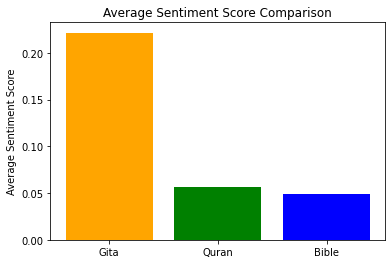

In [239]:
avg_gita = gita['Compound'].mean()
avg_quran = quran['Compound'].mean()
avg_bible = bible['Compound'].mean()

# Plot Bar Chart
texts = ['Gita', 'Quran', 'Bible']
avg_scores = [avg_gita, avg_quran, avg_bible]

plt.bar(texts, avg_scores, color=['orange', 'green', 'blue'])
plt.title("Average Sentiment Score Comparison")
plt.ylabel("Average Sentiment Score")
plt.show()

# MODERN TOPICS

In [60]:
# Modern Topics - Keywords

topics_keywords = {
    "gender_equality": ["man", "woman", "father", "mother", "son", "daughter", "feminine", "masculine", "equal", "rights", 'role'],
    "violence_peace": ["war", "battle", "peace", "violence", "conflict", "fight", "harmony", "destruction", "calm", "tranquility", "kill", "enemy", "enemies"],
    "slavery_rights": ["servant", "slave", "master", "freedom", "rights", "oppression", "liberation", "chains", "justice", "suffering"],
    "tolerance_faith": ["faith", "religion", "path", "unity", "harmony", "worship", "belief", "sacred", "diversity", "brotherhood"],
    "freedom_speech": ["voice", "expression", "speech", "silence", "truth", "freedom", "opinion", "knowledge", "debate", "rights"],
    "sexuality_rights": ["desire", "love", "attraction", "identity", "gender", "union", "relationship", "passion", "gay"],
    "wealth": ["wealth", "poverty", "justice", "charity", "inequality", "share", "generosity", "fairness", "greed", "support"],
    "environment": ["nature", "earth", "balance", "trees", "river", "animals", "environment", "preservation", "life", "harmony"],
    "criminal_justice": ["punishment", "crime", "justice", "death", "sin", "law", "mercy", "guilt", "forgiveness", "judgement"],
    "science_rationality": ["reason", "logic", "truth", "knowledge", "mind", "intellect", "understanding", "wisdom", "inquiry", "evidence"]
}

In [ ]:
gita = pd.read_csv('Gita_vader.csv')
bible = pd.read_csv('Bible_vader.csv')
quran = pd.read_csv('Quran_vader.csv')

,Name,Surah,Ayat,Text,Sentiment,Positive,Neutral,Negative,Compound
0,The Opening,1,1,"In the name of Allah, the Beneficent, the Merc...","{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.292,0.708,0.000,0.5106
1,The Opening,1,2,"Praise be to Allah, Lord of the Worlds,","{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...",0.340,0.660,0.000,0.5574
2,The Opening,1,3,"The Beneficent, the Merciful.","{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.524,0.476,0.000,0.5106
3,The Opening,1,4,"Owner of the Day of Judgment,","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,The Opening,1,5,Thee (alone) we worship; Thee (alone) we ask f...,"{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou...",0.380,0.620,0.000,0.5994
...,...,...,...,...,...,...,...,...,...
6231,Mankind,114,2,"The King of mankind,","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
6232,Mankind,114,3,"The God of mankind,","{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.412,0.588,0.000,0.2732
6233,Mankind,114,4,"From the evil of the sneaking whisperer,","{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp...",0.000,0.577,0.423,-0.6597
6234,Mankind,114,5,"Who whispereth in the hearts of mankind,","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [182]:
# queries = [
    # "gender equality in society",
    # "roles of men and women",
    # "equality between genders",
    # "women's rights and status",
    # "treatment of men and women",
    # "duties of men and women",
    # "empowerment of women",
    # "gender equality in duties",
    # "roles and responsibilities of women and men",
    # "respect for women and gender fairness",
    # "society's view on men's and women's duties",
    # "Respect and roles of women and men in society",
    # "Justice and equality between men and women",
    # "social status of women and gender balance",
    # "masculine and feminine qualities",
    # "role of mother and father",
    # "duty of son and daughter"
# ]


In [177]:
queries = {
    'gender_equality': [    
        "gender equality in society",
        "roles of men and women",
        "equality between genders",
        "women's rights and status",
        "treatment of men and women",
        "duties of men and women",
        "empowerment of women",
        "gender equality in duties",
        "roles and responsibilities of women and men",
        "respect for women and gender fairness",
        "society's view on men's and women's duties",
        "Respect and roles of women and men in society",
        "Justice and equality between men and women",
        "social status of women and gender balance",
        "masculine and feminine qualities",
        "role of mother and father",
        "duty of son and daughter"
    ],

    'violence_peace': [
        "Peace and non-violence",
        "Condemnation of violence",
        "Righteous war and peace",
        "Seeking peace in conflict",
        "Peaceful resolutions in religious texts",
        "Teachings on forgiveness and non-retaliation",
        "Avoidance of harm and cruelty",
        "Path of peace and harmony",
        "Violence in defense of faith",
        "Peace as a divine commandment",
        "Sowing peace in communities",
        "war and killing people"
    ],

    "slavery_rights": [
        "slavery and servitude",
        "Freedom and the treatment of slaves",
        "Abolition of slavery ",
        "Compassion toward servants",
        "Human dignity",
        "Guidelines on freeing slaves",
        "Brotherhood and equal rights",
        "Relief for the oppressed",
        "Moral duties toward slaves",
        "Principles of humane treatment",
        "Justice for the oppressed"
    ],

    "tolerance_faith": [
        "Religious tolerance and coexistence",
        "Respect for different beliefs",
        "Unity in diversity of faiths",
        "Patience in faith and adversity",
        "Accepting others' beliefs",
        "Teachings on avoiding hatred",
        "Love and compassion",
        "Faith and harmony",
        "Mutual respect among followers",
        "Adherence to faith with tolerance",
        "Religious patience and forbearance",
        "punishment for apostasy"
    ],

    "freedon_speech": [
        "Speaking truth",
        "Guidelines on speech and conduct",
        "Freedom to express faith",
        "Boundaries of speech in religion",
        "Right to express one's thoughts",
        "Advising with kindness",
        "Silence vs. speech in teachings",
        "Rebuking and correcting others",
        "Honesty and open expression",
        "Speaking with wisdom and understanding",
        "Importance of righteous speech"
    ], 

    "sexuality": [
        "chastity and purity",
        "Marriage and sexual ethics",
        "Respect for one's spouse",
        "celibacy and abstinence",
        "Sexual immorality and consequences",
        "Sacredness of marital union",
        "Relations between husband and wife",
        "Adultery and its repercussions",
        "Commitment and fidelity",
        "Virtue and modesty",
        "Sexual behavior and responsibility",
        "men laying with men"
    ],

    "wealth_greed": [
        "Love of wealth and greed",
        "Charity and sharing wealth",
        "Warnings against hoarding",
        "Wealth as a trial or test",
        "Detachment from material possessions",
        "Dangers of excessive wealth",
        "Contentment and simplicity",
        "Responsibility of the rich",
        "Spiritual wealth vs. material wealth",
        "Virtue of giving to the needy",
        "Greed and its spiritual harm"
    ], 

    "environment_preservation": [
        "Stewardship of the earth",
        "Protection of nature",
        "caring for creation",
        "Animals and their treatment",
        "Balance and harmony with nature",
        "Responsibility toward the environment",
        "Use of natural resources",
        "Sustainability",
        "Respect for the environment",
        "Consequences of harming nature",
        "Role of humans in preserving life"
    ],

    "criminal_justice": [
        "Justice and fairness in punishment",
        "Mercy and severity in laws",
        "Punishment for wrongdoing",
        "Forgiveness and retribution",
        "Duties of judges and rulers",
        "Repentance and absolution",
        "Principles of lawful punishment",
        "Rehabilitation of the guilty",
        "Capital punishment",
        "Compassion in judgement",
        "Reward and punishment by divine law"
    ],

    "science_rationality": [
        "Reason and knowledge",
        "Harmony between faith and reason",
        "learning and wisdom",
        "Scientific thought and belief",
        "Understanding creation and the universe",
        "Encouragement for inquiry",
        "observation",
        "faith and logic",
        "Wisdom and rational thought",
        "Divine signs in nature",
        "Religious perspective on seeking truth"
    ]
}

In [178]:
analyzer = SentimentIntensityAnalyzer()

In [179]:
from sentence_transformers import SentenceTransformer, util

# MODERN TOPICS - GITA

In [180]:
verses = gita['Text'].tolist()

In [181]:
model = SentenceTransformer('all-MiniLM-L6-v2')
verse_embeddings = model.encode(verses, convert_to_tensor=True)

In [185]:
for query in queries:

    print(query)

    topics = queries[query]
    query_embeddings = model.encode(topics, convert_to_tensor=True)

    for i, query_embedding in enumerate(query_embeddings):
        similarities = util.pytorch_cos_sim(query_embedding, verse_embeddings)[0]
        top_k = 5  # Number of top verses to retrieve
        
        # Get the indices of the top k most similar verses
        top_results = torch.topk(similarities, k=top_k)

        print(f"\nTop verses for topic '{topics[i]}':")
        for score, idx in zip(top_results[0], top_results[1]):
            # Convert tensor index to integer using .item()
            print(f"Score: {score:.4f} - Verse: {verses[idx.item()]}")

    average_scores = torch.zeros(len(verse_embeddings))
    for query_embedding in query_embeddings:
        similarities = util.pytorch_cos_sim(query_embedding, verse_embeddings)[0]
        average_scores += similarities
    average_scores /= len(topics)
    top_k = 10
    top_results = torch.topk(average_scores, k=top_k)
    print("\nTop 10 verses with highest average similarity scores:\n")
    for score, idx in zip(top_results[0], top_results[1]):
        print(f"Average Score: {score:.4f} - Verse: {verses[idx.item()]}")
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print()

gender_equality

Top verses for topic 'gender equality in society':
Score: 0.4138 - Verse: Where there is no sense of unity, the women of the family become corrupt; and with the corruption of its women, society is plunged into chaos.
Score: 0.3607 - Verse: I am rich and well-born. Who is equal to me? I will perform sacrifices and give gifts, and rejoice in my own generosity. This is how they go on, deluded by ignorance.
Score: 0.3331 - Verse: What the outstanding person does, others will try to do. The standards such people create will be followed by the whole world.
Score: 0.2943 - Verse: By serving me with steadfast love, a man or woman goes beyond the gunas. Such a one is fit for union with Brahman.
Score: 0.2588 - Verse: But the illumined man or woman understands the domain of the gunas and is not attached. Such people know that the gunas interact with each other; they do not claim to be the doer.

Top verses for topic 'roles of men and women':
Score: 0.3393 - Verse: In this field 

In [186]:
verses = quran['Verse'].tolist()

In [187]:
model = SentenceTransformer('all-MiniLM-L6-v2')
verse_embeddings = model.encode(verses, convert_to_tensor=True)

In [188]:
for query in queries:

    print(query)

    topics = queries[query]
    query_embeddings = model.encode(topics, convert_to_tensor=True)

    for i, query_embedding in enumerate(query_embeddings):
        similarities = util.pytorch_cos_sim(query_embedding, verse_embeddings)[0]
        top_k = 5  # Number of top verses to retrieve
        
        # Get the indices of the top k most similar verses
        top_results = torch.topk(similarities, k=top_k)

        print(f"\nTop verses for topic '{topics[i]}':")
        for score, idx in zip(top_results[0], top_results[1]):
            # Convert tensor index to integer using .item()
            print(f"Score: {score:.4f} - Verse: {verses[idx.item()]}")

    average_scores = torch.zeros(len(verse_embeddings))
    for query_embedding in query_embeddings:
        similarities = util.pytorch_cos_sim(query_embedding, verse_embeddings)[0]
        average_scores += similarities
    average_scores /= len(topics)
    top_k = 10
    top_results = torch.topk(average_scores, k=top_k)
    print("\nTop 10 verses with highest average similarity scores:\n")
    for score, idx in zip(top_results[0], top_results[1]):
        print(f"Average Score: {score:.4f} - Verse: {verses[idx.item()]}")
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print()

gender_equality

Top verses for topic 'gender equality in society':
Score: 0.4109 - Verse: O mankind! Lo! We have created you male and female, and have made you nations and tribes that ye may know one another. Lo! the noblest of you, in the sight of Allah, is the best in conduct. Lo! Allah is Knower, Aware.
Score: 0.3963 - Verse: As for the thief, both male and female, cut off their hands. It is the reward of their own deeds, an exemplary punishment from Allah. Allah is Mighty, Wise.
Score: 0.3831 - Verse: Are yours the males and His the females ?
Score: 0.3820 - Verse: Whosoever doeth right, whether male or female, and is a believer, him verily we shall quicken with good life, and We shall pay them a recompense in proportion to the best of what they used to do.
Score: 0.3765 - Verse: As a warning unto men,

Top verses for topic 'roles of men and women':
Score: 0.5090 - Verse: Are yours the males and His the females ?
Score: 0.5014 - Verse: And that He createth the two spouses, the mal

In [189]:
verses = bible['t'].tolist()

In [190]:
model = SentenceTransformer('all-MiniLM-L6-v2')
verse_embeddings = model.encode(verses, convert_to_tensor=True)

In [191]:
for query in queries:

    print(query)

    topics = queries[query]
    query_embeddings = model.encode(topics, convert_to_tensor=True)

    for i, query_embedding in enumerate(query_embeddings):
        similarities = util.pytorch_cos_sim(query_embedding, verse_embeddings)[0]
        top_k = 5  # Number of top verses to retrieve
        
        # Get the indices of the top k most similar verses
        top_results = torch.topk(similarities, k=top_k)

        print(f"\nTop verses for topic '{topics[i]}':")
        for score, idx in zip(top_results[0], top_results[1]):
            # Convert tensor index to integer using .item()
            print(f"Score: {score:.4f} - Verse: {verses[idx.item()]}")

    average_scores = torch.zeros(len(verse_embeddings))
    for query_embedding in query_embeddings:
        similarities = util.pytorch_cos_sim(query_embedding, verse_embeddings)[0]
        average_scores += similarities
    average_scores /= len(topics)
    top_k = 10
    top_results = torch.topk(average_scores, k=top_k)
    print("\nTop 10 verses with highest average similarity scores:\n")
    for score, idx in zip(top_results[0], top_results[1]):
        print(f"Average Score: {score:.4f} - Verse: {verses[idx.item()]}")
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print()

gender_equality

Top verses for topic 'gender equality in society':
Score: 0.4334 - Verse: So now put every male child to death, and every woman who has had sex relations with a man.
Score: 0.4237 - Verse: And if what he gives for a peace-offering to the Lord is of the flock, let him give a male or female, without any mark on it.
Score: 0.4143 - Verse: In my opinion it is right for a woman not to be a teacher, or to have rule over a man, but to be quiet.
Score: 0.4048 - Verse: So, brothers, we are not children of the servant-woman, but of the free woman.
Score: 0.4039 - Verse: And God made man in his image, in the image of God he made him: male and female he made them.

Top verses for topic 'roles of men and women':
Score: 0.4908 - Verse: And the man was not made for the woman, but the woman for the man.
Score: 0.4838 - Verse: And God made man in his image, in the image of God he made him: male and female he made them.
Score: 0.4649 - Verse: As for man, the son of woman, his days are s

# MODERN TOPICS SENTIMENT ANALYSIS

In [2]:
df = pd.read_csv('ModernTopicRelevantVerses.csv')
df

,Book,Topic,Text
0,gita,gender,"Where there is no sense of unity, the women of..."
1,gita,gender,"I am death, which overcomes all, and the sourc..."
2,gita,violence,These signs bode evil for us. I do not see tha...
3,gita,violence,"I dont even know which would be better, for us..."
4,gita,violence,Though they are overpowered by greed and see n...
...,...,...,...
191,bible,justice,At the time all punishment seems to be pain an...
192,bible,justice,"Do not give punishment for wrongs done to you,..."
193,bible,science,The heart of the man of good sense gets knowle...
194,bible,science,"Putting an end to reasonings, and every high t..."


In [16]:
analyzer = SentimentIntensityAnalyzer()

In [17]:
df['Sentiment'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x))
df['Positive'] = df['Sentiment'].apply(lambda x: x['pos'])
df['Neutral'] = df['Sentiment'].apply(lambda x: x['neu'])
df['Negative'] = df['Sentiment'].apply(lambda x: x['neg'])
df['Compound'] = df['Sentiment'].apply(lambda x: x['compound'])

In [18]:
df

,Book,Topic,Text,Sentiment,Positive,Neutral,Negative,Compound
0,gita,gender,"Where there is no sense of unity, the women of...","{'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'comp...",0.000,0.803,0.197,-0.7096
1,gita,gender,"I am death, which overcomes all, and the sourc...","{'neg': 0.089, 'neu': 0.477, 'pos': 0.434, 'co...",0.434,0.477,0.089,0.9349
2,gita,violence,These signs bode evil for us. I do not see tha...,"{'neg': 0.376, 'neu': 0.528, 'pos': 0.096, 'co...",0.096,0.528,0.376,-0.8591
3,gita,violence,"I dont even know which would be better, for us...","{'neg': 0.167, 'neu': 0.697, 'pos': 0.136, 'co...",0.136,0.697,0.167,-0.3400
4,gita,violence,Though they are overpowered by greed and see n...,"{'neg': 0.493, 'neu': 0.415, 'pos': 0.092, 'co...",0.092,0.415,0.493,-0.9260
...,...,...,...,...,...,...,...,...
191,bible,justice,At the time all punishment seems to be pain an...,"{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp...",0.000,0.805,0.195,-0.6470
192,bible,justice,"Do not give punishment for wrongs done to you,...","{'neg': 0.092, 'neu': 0.665, 'pos': 0.243, 'co...",0.243,0.665,0.092,0.7196
193,bible,science,The heart of the man of good sense gets knowle...,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp...",0.261,0.739,0.000,0.7184
194,bible,science,"Putting an end to reasonings, and every high t...","{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.112,0.888,0.000,0.3400


In [19]:
average_scores = df.groupby(['Book', 'Topic'])['Compound'].mean().reset_index()
average_scores

,Book,Topic,Compound
0,bible,environment,-0.027760
1,bible,gender,-0.158845
2,bible,justice,-0.093350
3,bible,science,0.628500
4,bible,sexuality,-0.060673
5,bible,slavery,0.288550
6,bible,speech,0.302887
7,bible,tolerance,-0.323033
8,bible,violence,0.018114
9,bible,wealth,-0.108775


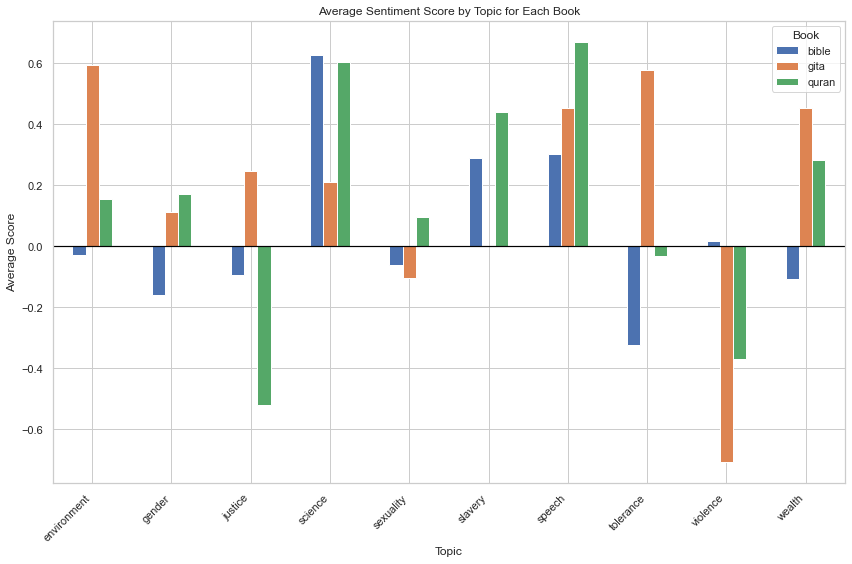

In [20]:
pivot_df = average_scores.pivot(index='Topic', columns='Book', values='Compound')

# Plot bar graphs by topic
pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Sentiment Score by Topic for Each Book')
plt.ylabel('Average Score')
plt.xlabel('Topic')
plt.xticks(rotation=45, ha='right')
plt.axhline(0.0, color='black', linewidth=1.2) 
plt.legend(title='Book')
plt.tight_layout()
plt.show()

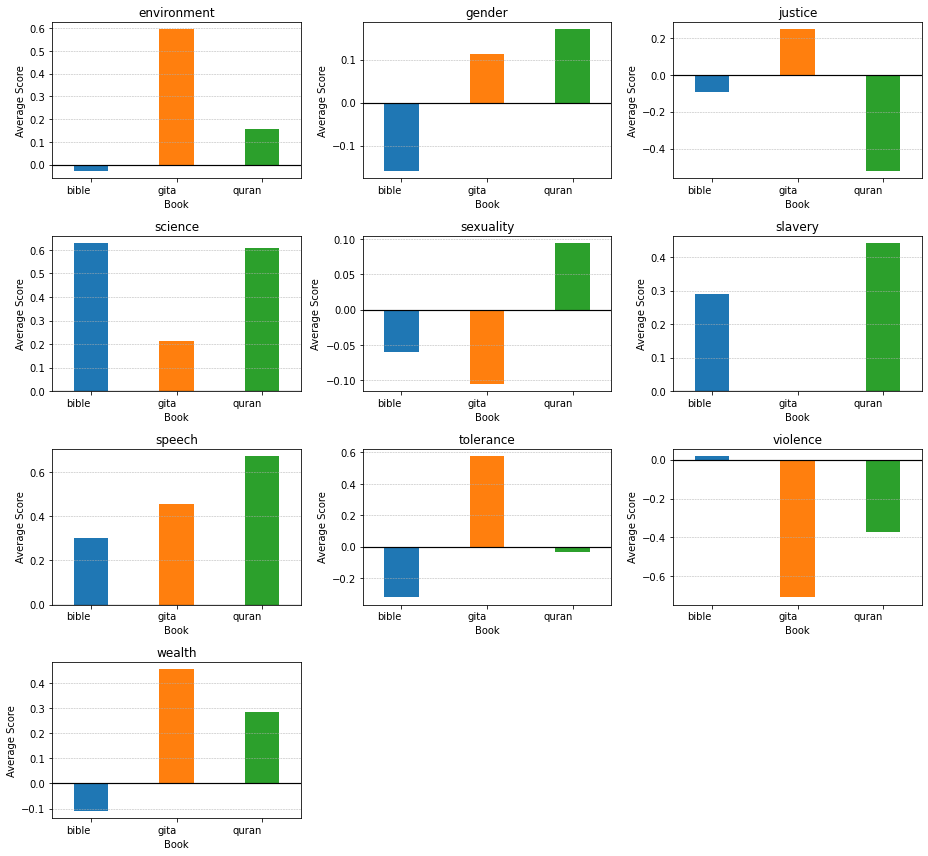

In [234]:
pivot_df = average_scores.pivot(index='Topic', columns='Book', values='Compound')

# Plot subgraphs for each topic
topics = pivot_df.index
num_topics = len(topics)
fig, axes = plt.subplots(nrows=(num_topics // 3) + (num_topics % 3 > 0), ncols=3, figsize=(13, 12))
axes = axes.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different colors for the books

for i, topic in enumerate(topics):
    pivot_df.loc[topic].plot(kind='bar', ax=axes[i], title=topic, legend=False, color=colors, width=0.4)
    axes[i].set_ylabel('Average Score')
    axes[i].set_xlabel('Book')
    axes[i].set_xticklabels(pivot_df.columns, rotation=0, ha='right')
    axes[i].axhline(0.0, color='black', linewidth=1.2)  # Darker line for the 0.0 axis
    axes[i].grid(True, axis='y', linestyle='--', linewidth=0.5)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

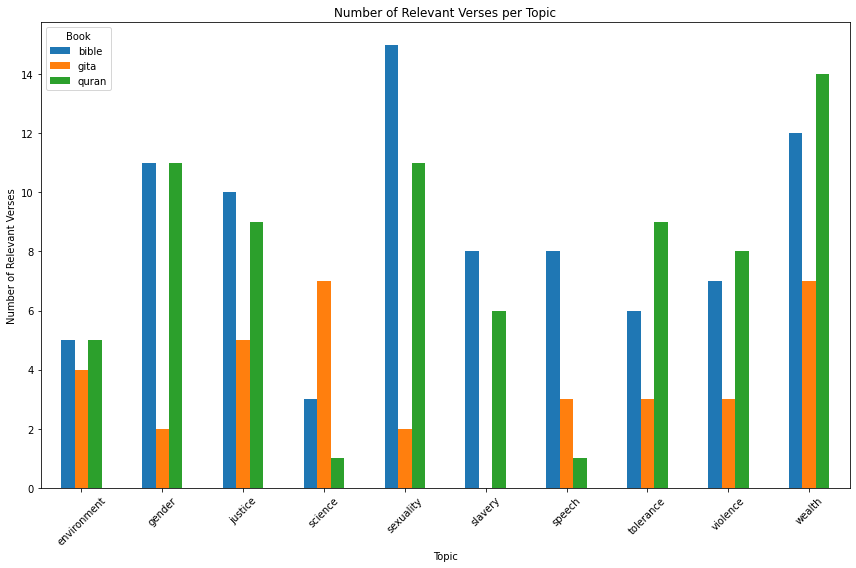

In [5]:
grouped_df = df.groupby(['Book', 'Topic']).size().reset_index(name='count')

# Pivot the data for better plotting
pivot_df = grouped_df.pivot(index='Topic', columns='Book', values='count').fillna(0)

# Plotting
pivot_df.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Number of Relevant Verses per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Relevant Verses')
plt.xticks(rotation=45)
plt.legend(title='Book')
plt.tight_layout()
plt.show()
